<a href="https://colab.research.google.com/github/Shaghayegh-Aflatounian/Deep-learning-with-keras/blob/main/Deep_learning_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the Sequential model and Dense layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a Sequential model
model = Sequential()

# Add an input layer and a hidden layer with 10 neurons
model.add(Dense(10, input_shape=(2,), activation="relu"))

# Add a 1-neuron output layer
model.add(Dense(1))

# Summarise your model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
## we have 3 layers with 50 neurons?do we have 3 layers with 50 neurons

# Instantiate a Sequential model
model = Sequential()

# Add a Dense layer with 50 neurons and an input of 1 neuron
model.add(Dense(50, input_shape=(1,), activation='relu'))

# Add two Dense layers with 50 neurons and relu activation
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))

# End your model with a Dense layer and no activation
model.add(Dense(1))

In [ ]:
# Compile your model
model.compile(optimizer = 'adam', loss = 'mse')

print("Training started..., this can take a while:")

# Fit your model on your data for 30 epochs
model.fit(time_steps, y_positions, epochs = 30)

# Evaluate your model
print("Final loss value:",model.evaluate(time_steps, y_positions))

Remember np.arange(x,y) produces a range of values from x to y-1. That is the [x, y) interval.

In [ ]:
# Predict the twenty minutes orbit
twenty_min_orbit = model.predict(np.arange(-10, 11))
# Plot the twenty minute orbit
plot_orbit(twenty_min_orbit)


# **Different classification models**

you will know how to solve binary, multi-class, and multi-label problems with neural networks. All of this by solving problems like detecting fake dollar bills, deciding who threw which dart at a board, and building an intelligent system to water your farm.

**Binary Classification**


**Banknote detection**

You will practice building classification models in Keras with the Banknote Authentication dataset.

Your goal is to distinguish between real and fake dollar bills. In order to do this, the dataset comes with 4 features: variance,skewness,kurtosis and entropy. These features are calculated by applying mathematical operations over the dollar bill images. The labels are found in the dataframe's class column.You will perform binary classification by using a single neuron as an output. The input layer will have 4 neurons since we have 4 features in our dataset. The model's output will be a value constrained between 0 and 1.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
banknotes = pd.read_csv('your_dataset.csv')

# Plot the pairplot
sns.pairplot(banknotes, hue='class')
plt.show()

# Describe the data
print('Dataset stats: \n', banknotes.describe())

# Count the number of observations per class
print('Observations per class: \n', banknotes['class'].value_counts())

# Prepare your data for training
X = banknotes.drop('class', axis=1)
y = banknotes['class']

# Create a sequential model
model = Sequential()

# Add a dense layer
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

# Compile your model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fit the model on your data
model.fit(X, y, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X, y)
print('Loss:', loss)
print('Accuracy:', accuracy)

In [ ]:
# Train your model for 20 epochs
model.fit(X_train, y_train, epochs = 20)

# Evaluate your model accuracy on the test set
accuracy = model.evaluate(X_test, y_test)[1]

# Print accuracy
print('Accuracy', accuracy)

**Multi classification**

we're going to build a model that predicts who threw which dart only based on where that dart landed! (That is the dart's x and y coordinates on the board.)

This problem is **a multi-class classification problem since each dart can only be thrown by one of 4 competitors.** So classes/labels are mutually exclusive, and therefore we can build a neuron with as many output as competitors and use the **softmax activation function to achieve a total sum of probabilities of 1 over all competitors.**

The Sequential model and Dense layers are already imported for you to use.

why ouer 2 input? because we are importing the x and y location of each dart
why we have 4 output? because we have 4competitors


In [ ]:
# Instantiate a sequential model
model = Sequential()
# Add 3 dense layers of 128, 64 and 32 neurons each
model.add(Dense(128, input_shape=(2,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Add a dense layer with as many neurons as competitors
model.add(Dense(4, activation='softmax'))
# Compile your model using categorical_crossentropy loss
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

**Categorical to numerical**

In the console you can check** that your labels, darts.competitor are not yet in a format to be understood by your network.** They contain the names of the competitors as strings. You will first turn these competitors into unique numbers,then use the to_categorical() function from keras.utils to turn these numbers into their one-hot encoded representation.

In [ ]:
# Transform into a categorical variable
darts.competitor = pd.Categorical(darts.competitor)

# Assign a number to each category (label encoding)
darts.competitor = darts.competitor.cat.codes

# Import to_categorical from keras utils module
from tensorflow.keras.utils import to_categorical

coordinates = darts.drop(['competitor'], axis=1)
# Use to_categorical on your labels
competitors = to_categorical(darts.competitor)
# Now print the one-hot encoded labels
print('One-hot encoded competitors: \n',competitors)

Each competitor is now a vector of length 4, full of zeroes except for the position representing her or himself.

The pd.Categorical() function is applied to the “competitor” column.
By doing this, the values in the “competitor” column are treated as distinct categories rather than continuous data.
This transformation is useful when dealing with non-numeric data, such as names or labels.

In [ ]:
# Fit your model to the training data for 200 epochs
model.fit(coord_train,competitors_train,epochs=200)

# Evaluate your model accuracy on the test data
accuracy = model.evaluate(coord_test, competitors_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

 As you've seen you can easily interpret the softmax output. This can also help you spot those observations where your network is less certain on which class to predict, since you can see the probability distribution among classes per prediction. Let's learn how to solve new problems with neural networks!*italicized text*

In [ ]:
# Predict on coords_small_test
preds = model.predict(coords_small_test)

# Print preds vs true values
print("{:45} | {}".format('Raw Model Predictions','True labels'))
for i,pred in enumerate(preds):
  print("{} | {}".format(pred,competitors_small_test[i]))

# Extract the position of highest probability from each pred vector
preds_chosen = [np.argmax(pred) for pred in preds]
# Print preds vs true values
print("{:10} | {}".format('Rounded Model Predictions','True labels'))
for i,pred in enumerate(preds_chosen):
  print("{:25} | {}".format(pred,competitors_small_test[i]))

**Multi-label**


You're going to automate the watering of farm parcels by making an intelligent irrigation machine. Multi-label classification problems differ from multi-class problems in that each observation can be labeled with zero or more classes. So classes/labels are not mutually exclusive, you could water all, none or any combination of farm parcels based on the inputs.

To account for this behavior what we do is have an output layer with as many neurons as classes but this time, unlike in multi-class problems, each output neuron has a sigmoid activation function. This makes each neuron in the output layer able to output a number between 0 and 1 independently.

In [ ]:
# Instantiate a Sequential model
model = Sequential()

# Add a hidden layer of 64 neurons and a 20 neuron's input
model.add(Dense(64, input_shape=(20,), activation="relu"))


# Add an output layer of 3 neurons with sigmoid activation
model.add(Dense(3, activation='sigmoid'))
# Compile your model with binary crossentropy loss
model.compile(optimizer='adam',
           loss = 'binary_crossentropy',
           metrics=['accuracy'])

model.summary()

In [ ]:
# Train for 100 epochs using a validation split of 0.2
model.fit(sensors_train, parcels_train, epochs = 100, validation_split = 0.2)

# Predict on sensors_test and round up the predictions
preds = model.predict(sensors_test)
preds_rounded = np.round(preds)

# Print rounded preds
print('Rounded Predictions: \n', preds_rounded)

# Evaluate your model's accuracy on the test data
accuracy = model.evaluate(sensors_test,parcels_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

**FULL CODE FOR SETTING THE RATIO OF TRAINING AND TEST SIZE**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

# Define the train sizes
train_sizes = [0.6, 0.7, 0.8]

# Load your dataset (X_train, y_train) and perform any necessary preprocessing

# Define your Keras model
model = keras.models.Sequential()
# Add your layers

# Get the initial weights of the model
initial_weights = model.get_weights()

# Lists for storing accuracies
train_accs = []
test_accs = []

# Iterate over train sizes
for train_size in train_sizes:
    # Split the data into training and test sets
    X_train_frac, X_test, y_train_frac, y_test = train_test_split(X_train, y_train, train_size=train_size)

    # Set the initial weights for the model
    model.set_weights(initial_weights)

    # Fit the model on the training set fraction
    model.fit(X_train_frac, y_train_frac, epochs=100, verbose=0, callbacks=[EarlyStopping(monitor='loss', patience=1)])

    # Get the accuracy for this training set fraction
    train_acc = model.evaluate(X_train_frac, y_train_frac, verbose=0)[1]
    train_accs.append(train_acc)

    # Get the accuracy on the whole test set
    test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
    test_accs.append(test_acc)

    print("Done with size:", train_size)

# Print the accuracies for each train size
print("Train accuracies:", train_accs)
print("Test accuracies:", test_accs)

 **Call Back in *keras**

 These graphs are really useful for detecting overfitting and to know if your neural network would benefit from more training data.

In [ ]:
# Train your model and save its history
h_callback = model.fit(X_train, y_train, epochs = 25,
               validation_data=(X_test, y_test))

plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])

Now you won't ever fall short of epochs! Your model will stop early if the quantity monitored doesn't improve for the given amount of epochs.

In [ ]:
# Import the early stopping callback
from tensorflow.keras.callbacks import EarlyStopping

# Define a callback to monitor val_accuracy
monitor_val_acc = EarlyStopping(monitor='val_accuracy',
                       patience=5)

# Train your model using the early stopping callback
model.fit(X_train, y_train,
           epochs=1000, validation_data=(X_test, y_test),
           callbacks=[monitor_val_acc])

Deep learning models can take a long time to train, especially when you move to deeper architectures and bigger datasets. Saving your model every time it improves as well as stopping it when it no longer does allows you to worry less about choosing the number of epochs to train for. You can also restore a saved model anytime and resume training where you left it.

In [ ]:
# Import the EarlyStopping and ModelCheckpoint callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Early stop on validation accuracy
monitor_val_acc = EarlyStopping(monitor = 'val_accuracy', patience = 3)

# Save the best model as best_banknote_model.hdf5
model_checkpoint = ModelCheckpoint('best_banknote_model.hdf5', save_best_only = True)

# Fit your model for a stupid amount of epochs
h_callback = model.fit(X_train, y_train,
                    epochs = 1000000000000,
                    callbacks = [monitor_val_acc, model_checkpoint],
                    validation_data = (X_test, y_test))

**Learning curves**

Plotting the learning curve helps visualize the training progress, including how the loss changes over epochs for both the training and validation sets. It can provide insights into whether the model is overfitting, underfitting, or converging well.

In [ ]:
# Instantiate a Sequential model
model = Sequential()

# Input and hidden layer with input_shape, 16 neurons, and relu
model.add(Dense(16, input_shape = (64,), activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

# Compile your model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Test if your model is well assembled by predicting before training
print(model.predict(X_train))

In [ ]:
# Train your model for 60 epochs, using X_test and y_test as validation data
h_callback = model.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test), verbose=0)

# Extract from the h_callback object loss and val_loss to plot the learning curve
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

verbose parameter in fit:
The verbose parameter controls the verbosity mode during training. It determines whether or not to show the progress of the training process on the console output.

If verbose is set to 0, no output will be displayed on the console during the training.
If verbose is set to 1, progress bars will be shown for each epoch.
If verbose is set to 2, a simple one-line progress bar will be displayed for each epoch.

When we want to make our model we first initilize by setting the initial weight


In [ ]:
import numpy as np
from tensorflow import keras

# Define a simple model
model = keras.models.Sequential()
model.add(keras.layers.Dense(10, activation='relu', input_shape=(100,)))  # Input layer with 100 features
model.add(keras.layers.Dense(10, activation='softmax'))  # Output layer with 10 classes

# Get the current weights of the model
current_weights = model.get_weights()

# Create your own initial weights
initial_weights = []
for weight in current_weights:
    shape = weight.shape
    initial_weight = np.random.rand(*shape)  # Set initial weights randomly
    initial_weights.append(initial_weight)

# Set the initial weights for the model
model.set_weights(initial_weights)

Yes, you are correct. When you create** a Keras model, the initial weights are automatically set for you**. The specific initialization method depends on the type of layer used in the model. For example, dense layers typically use a Glorot uniform initializer by default.

However, **if you want to set your own initial weights, you can do so by providing them to the model during its creation or by using the model.set_weights() function.**

In [ ]:
for size in training_sizes:
  	# Get a fraction of training data (we only care about the training data)
    X_train_frac, y_train_frac = X_train[:size], y_train[:size]

    # Reset the model to the initial weights and train it on the new training data fraction
    model.set_weights(initial_weights)
    model.fit(X_train_frac, y_train_frac, epochs = 50, callbacks = [early_stop])

    # Evaluate and store both: the training data fraction and the complete test set results
    train_accs.append(model.evaluate(X_train, y_train)[1])
    test_accs.append(model.evaluate(X_test, y_test)[1])

# Plot train vs test accuracies
plot_results(train_accs,test_accs)

 The results shows that your model would not benefit a lot from more training data, since the test set accuracy is already starting to flatten. It's time to look at activation funtions!

In [ ]:
#enumerate function

In [ ]:
x = ('apple', 'banana', 'cherry')
y = enumerate(x)

print(list(y))

[(0, 'apple'), (1, 'banana'), (2, 'cherry')]


In [ ]:
# Predict on coords_small_test
preds = model.predict(coords_small_test)
# Print preds vs true values
print("{:45} | {}".format('Raw Model Predictions','True labels'))
for i,pred in enumerate(preds):
  print("{} | {}".format(pred,competitors_small_test[i]))

# Extract the position of the highest probability from each pred vector
preds_chosen = [np.argmax(pred) for pred in preds]


**Comparing activation functions**


In [ ]:
np.random.seed(1)

def get_model(act_function) :
  model = Sequential()
  model.add(Dense(4, input_shape=(2,), activation=activation_function))
  model.add(Dense(50, activation='sigmoid'))
  return model

In [ ]:
activations = ['relu', 'leaky_relu', 'sigmoid', 'tanh']

for act in activations:
  # Get a new model with the current activation
  model = get_model(act)
  # Fit the model and store the history results
  h_callback = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, verbose=0)
  activation_result[act]=history



In [ ]:
import pandas as pd

val_loss_per_function={k:v.history['val_loss'] for k, v , in activation_result.items()}

val_acc_per_function={k:v.history['val_acc'] for k, v , in activation_result.items()}

In [ ]:
# Create a dataframe from val_loss_per_function
val_loss = pd.DataFrame(val_loss_per_function)# Call plot on the dataframe
val_loss.plot()
plt.show()

# Create a dataframe from val_acc_per_function
val_acc = pd.DataFrame(val_acc_per_function)

# Call plot on the dataframe
val_acc.plot()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

np.random.seed(1)

def get_model(activation_function):
    model = Sequential()
    model.add(Dense(4, input_shape=(2,), activation=activation_function))
    model.add(Dense(50, activation='sigmoid'))
    return model

activations = ['relu', 'leaky_relu', 'sigmoid', 'tanh']
activation_result = {}  # Dictionary to store activation function results

for act in activations:
    # Get a new model with the current activation
    model = get_model(act)
    # Fit the model and store the history results
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, verbose=0)
    activation_result[act] = history

# Create dictionaries for validation loss and validation accuracy per activation function
val_loss_per_function = {k: v.history['val_loss'] for k, v in activation_result.items()}
val_acc_per_function = {k: v.history['val_acc'] for k, v in activation_result.items()}

# Create dataframes from the dictionaries
val_loss = pd.DataFrame(val_loss_per_function)
val_acc = pd.DataFrame(val_acc_per_function)

# Plot validation loss
val_loss.plot()
plt.show()

# Plot validation accuracy
val_acc.plot()
plt.show()

Certainly! Let's break down the code snippet `k: v.history['val_loss'] for k`:

In the dictionary comprehension `k: v.history['val_loss'] for k`, the `k:` part represents the key of the resulting dictionary, and the `v.history['val_loss']` part represents the value.

Here's a step-by-step explanation:

1. `k:`: This defines the key of each key-value pair in the resulting dictionary. In this case, `k` represents the activation function name.

2. `v.history['val_loss']`: This specifies the value associated with each key in the resulting dictionary. Here, `v` represents the history object corresponding to the activation function, and `v.history['val_loss']` retrieves the validation loss values from the history object.

3. `for k`: This indicates that the dictionary comprehension iterates over each activation function name (`k`). It assigns the activation function name to the key (`k:`) and retrieves the corresponding validation loss values (`v.history['val_loss']`) for that activation function.

In summary, the dictionary comprehension `k: v.history['val_loss'] for k` creates a dictionary where the keys are the activation function names, and the values are the corresponding validation loss values for each activation function.

**Batch size and batch normalization**


You've seen models are usually trained in batches of a fixed size. The smaller a batch size, the more weight updates per epoch, but at a cost of a more unstable gradient descent. Specially if the batch size is too small and it's not representative of the entire training set.

Let's see how different batch sizes affect the accuracy of a simple binary classification model that separates red from blue dots.

You'll use a batch size of one, updating the weights once per sample in your training set for each epoch. Then you will use the entire dataset, updating the weights only once per epoch.

You can see that accuracy is lower when using a batch size equal to the training set size. This is not because the network had more trouble learning the optimization function: Even though the same number of epochs were used for both batch sizes the number of resulting weight updates was very different!. With a batch of size the training set and 5 epochs we only get 5 updates total, each update computes and averaged gradient descent with all the training set observations. To obtain similar results with this batch size we should increase the number of epochs so that more weight updates take place.

In [ ]:
# Get a fresh new model with get_model
## the get model is defined about in the function
model = get_model()

# Train your model for 5 epochs with a batch size of 1
model.fit(X_train, y_train, epochs=5, batch_size=1)
print("\n The accuracy when using a batch of size 1 is: ",
      model.evaluate(X_test, y_test)[1])



In [ ]:
model = get_model()

# Fit your model for 5 epochs with a batch of size the training set
model.fit(X_train, y_train, epochs=5, batch_size=700)
print("\n The accuracy when using the whole training set as batch-size was: ",
      model.evaluate(X_test, y_test)[1])

No, stochastic gradient descent (SGD) is not only for a batch size of 1. In fact, SGD refers to the optimization algorithm where the model updates its weights based on a randomly selected mini-batch of samples from the training set, which can have a batch size greater than 1.

SGD can be used with various batch sizes, including 1 (which is often referred to as true SGD) or larger sizes like 16, 32, or even more. The choice of batch size depends on several factors, including:

1. Computational Resources: Larger batch sizes require more memory to store the gradients and may need more computational power for processing. If you have limited resources, you may choose a smaller batch size.

2. Generalization: Smaller batch sizes, such as 1 or a few samples, can introduce more randomness into the weight updates and act as a form of regularization. This can help the model generalize better to unseen data. However, larger batch sizes may provide more stable updates and can be useful for certain types of problems.

3. Convergence Speed: Smaller batch sizes can lead to faster convergence since the model updates its weights more frequently. On the other hand, larger batch sizes may require more epochs to achieve similar convergence, but each epoch can be faster due to parallelization and more efficient computation.

Regarding your example with 5 epochs and a data size of 700, let's consider two scenarios:

1. Batch Size of 1:
   - With a batch size of 1, the model updates its weights after processing each individual sample.
   - In 5 epochs, the model goes through the entire dataset 5 times, resulting in a total of 5 * 700 = 3500 weight updates.

2. Batch Size of 700:
   - With a batch size equal to the data size, the model updates its weights once after processing the entire dataset.
   - In 5 epochs, the model goes through the entire dataset 5 times, resulting in a total of 5 weight updates.

As you can see, the number of weight updates differs between the two scenarios. With a batch size of 1, the model updates its weights more frequently, whereas with a batch size equal to the data size, the weight update happens only once after processing the entire dataset.

The choice of batch size depends on the specific problem, computational resources, and the trade-off between convergence speed and solution quality. It is often a hyperparameter that needs to be tuned through experimentation to find the optimal balance.

 SGD randomly selects mini-batches from the training set during each iteration, and the batch size determines the number of samples in each mini-batch. The batch size is typically a fixed hyperparameter, but it can be experimented with to find the optimal value for a particular problem.

In [ ]:
# Import batch normalization from keras layers
from tensorflow.keras.layers import BatchNormalization

# Build your deep network
batchnorm_model = Sequential()
batchnorm_model.add(Dense(50, input_shape=(64,), activation='relu', kernel_initializer='normal'))
batchnorm_model.add(BatchNormalization())

batchnorm_model.add(Dense(50, activation='relu', kernel_initializer='normal'))
batchnorm_model.add(BatchNormalization())

batchnorm_model.add(Dense(50, activation='relu', kernel_initializer='normal'))
batchnorm_model.add(BatchNormalization())

batchnorm_model.add(Dense(10, activation='softmax', kernel_initializer='normal'))

# Compile your model with sgd
batchnorm_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In this case, kernel_initializer='normal' indicates that the weights of the Dense layers will be initialized using a normal distribution. The normal distribution, also known as the Gaussian distribution, is a common choice for weight initialization. It generates random values centered around zero, following a bell-shaped curve.

By using kernel_initializer='normal', the weights of each Dense layer in the batchnorm_model will be randomly initialized from a normal distribution. The random initialization helps in breaking the symmetry in the network and allows the model to learn distinct representations.

In [ ]:
# Train your standard model, storing its history callback
h1_callback = standard_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=0)

# Train the batch normalized model you recently built, store its history callback
h2_callback = batchnorm_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=0)

# Call compare_histories_acc passing in both model histories
compare_histories_acc(h1_callback,h2_callback)

Batch normalization tends to increase the learning speed of our models and make their learning curves more stable. Let's see how two identical models with and without batch normalization compare.

You can see that for this deep model batch normalization proved to be useful, helping the model obtain high accuracy values just over the first 10 training epochs.

# ***hyperparamethers tuning***

what can we change to optimize the performance of our model?

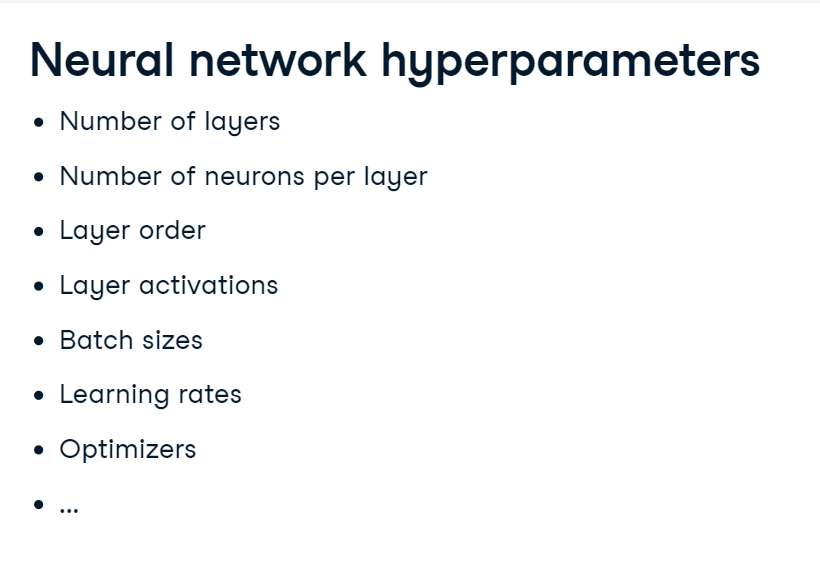

Let's tune the hyperparameters of a binary classification model that does well classifying the breast cancer dataset.

we've seen that the first step to turn a model into a sklearn estimator is to build a function that creates it. The definition of this function is important since hyperparameter tuning is carried out by varying the arguments your function receives.

Build a simple create_model() function that receives both a learning rate and an activation function as arguments. The Adam optimizer has been imported as an object from tensorflow.keras.optimizers so that you can also change its learning rate parameter.

a sample of hyperpaeamether optimization in sklearn

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Instantiate your classifier
tree = DecisionTreeClassifier()
# Define a series of parameters to look over
params = {'max_depth':[3,None],"max_features":range(1,4),'min_samples_leaf': range(1,4)}
# Perform random search with cross validation
tree_cv = RandomizedSearchCV(tree, params, cv=5)
tree_cv.fit(X,y)
# Print the best parameters
print(tree_cv.best_params_)

to perform randomized search on a keras model we need some paramethers to try
for example:

In [ ]:
#Random search on Keras models
# Define a series of parameters
params = dict(optimizer=['sgd','adam'], epochs=3,batch_size=[5, 10, 20], activation=['relu','tanh'])
# Create a random search cv object and fit it to the data
random_search = RandomizedSearchCV(model, params_dist=params, cv=3)
random_search_results = random_search.fit(X, y)
# Print results
print("Best: %f using %s".format(random_search_results.best_score_,random_search_results.best_params_))

how to optimize the number of layers and number of neurons per layer

In [ ]:
params = dict(nl=[1, 2, 9], nn=[128,256,1000])

In [ ]:
def create
_
model(nl=1,nn=256):
model = Sequential()
model.add(Dense(16, input
_
shape=(2,), activation='relu'))
# Add as many hidden layers as specified in nl
for i in range(nl):
# Layers have nn neurons
model.add(Dense(nn, activation='relu'))
# End defining and compiling y

we can optimize our model by hyperparamthers in sklearn but first we need to change keras model to  sklearn estimators

Integrating Keras Models with sklearn: By defining a function that creates a model and using the KerasClassifier wrapper from TensorFlow's keras scikit-learn wrappers, you transformed Keras models into sklearn estimators. This allows for leveraging sklearn's cross-validation and hyperparameter search techniques on Keras models.

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
# Creates a model given an activation and learning rate
def create_model(learning_rate, activation):

  	# Create an Adam optimizer with the given learning rate
  	opt = Adam(lr = learning_rate)

  	# Create your binary classification model
  	model = Sequential()
  	model.add(Dense(128, input_shape = (30,), activation = activation))
  	model.add(Dense(256, activation = activation))
  	model.add(Dense(1, activation = 'sigmoid'))

  	# Compile your model with your optimizer, loss, and metrics
  	model.compile(optimizer = Adam, loss = validation, metrics = ['accuracy'])
  	return model

  # Import KerasClassifier from tensorflow.keras scikit learn wrappers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

# Create a KerasClassifier
model = KerasClassifier(build_fn = create_model)

# Define the parameters to try out
params = {'activation': ['relu', 'tanh'], 'batch_size': [ 32, 128,  256],
          'epochs': [50, 100, 200], 'learning_rate': [0.1, 0.01,0.001]}

# Create a randomize search cv object passing in the parameters to try
random_search = RandomizedSearchCV(model, param_distributions = params, cv = KFold(3))

# Running random_search.fit(X,y) would start the search,but it takes too long!
show_results()

# Import KerasClassifier from tensorflow.keras wrappers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Create a KerasClassifier
model = KerasClassifier(build_fn = create_model(learning_rate = 0.001, activation = 'relu'), epochs = 50,
             batch_size = 128, verbose = 0)

# Calculate the accuracy score for each fold
kfolds = cross_val_score(X, y, model, cv = 3)

# Print the mean accuracy
print('The mean accuracy was:', kfolds.mean())

# Print the accuracy standard deviation
print('With a standard deviation of:', kfolds.std())

In [ ]:
# Function that creates our Keras model
def create_model(optimizer='adam', activation='relu'):
model = Sequential()
model.add(Dense(16, input_shape=(2,), activation=activation))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizer, loss='binary_crossentropy')
return model
# Import sklearn wrapper from keras
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# Create a model as a sklearn estimator
model = KerasClassifier(build_fn=create_model, epochs=6, batch_size=16)

In [ ]:
# for example using crossvalidation
from sklearn.model_selection import cross_val_score
# Check how your keras model performs with 5 fold crossvalidation
kfold = cross_val_score(model, X, y, cv=5)
# Print the mean accuracy per fold
kfold.mean()
0.913333
# Print the standard deviation per fold
kfold.std()

# **Tensors, layers and autoencoders**

With this you can go through our layers. This is a useful tool when we want to obtain the output of a network at an intermediate layer.

For instance, if you get the input and output from the first layer of a network, you can build an inp_to_out function that returns the result of carrying out forward propagation through only the first layer for a given input tensor.

**It can be used to extract intermediate layer outputs for visualization, debugging, or other custom operations.**

In [ ]:
# Import tensorflow.keras backend
import tensorflow.keras.backend as K

# Input tensor from the 1st layer of the model
inp = model.layers[0].input

# Output tensor from the 1st layer of the model
out = model.layers[0].output
# Define a function from inputs to outputs
inp_to_out = K.function([inp], [out])

# Print the results of passing X_test through the 1st layer
print(inp_to_out([X_test]))

In [ ]:
for i in range(0, 21):
  	# Train model for 1 epoch
    h = model.fit(X_train, y_train, batch_size = 16, epochs = 1, verbose = 0)
    if i%4==0:
      # Get the output of the first layer
      layer_output = inp_to_out([X_test])[0]
      test_accuracy = model.evaluate(X_test, y_test)[1]

      # Plot 1st vs 2nd neuron output
      plot()

**autoencoder**

Autoencoders have several interesting applications like anomaly detection or image denoising. They aim at producing an output identical to its inputs. The input will be compressed into a lower dimensional space, encoded. The model then learns to decode it back to its original form. It is a method for dimentionality reduction, De-noising our data and help with anomaly detection.

Building an autoencoder
Autoencoders have several interesting applications like anomaly detection or image denoising. They aim at producing an output identical to its inputs. The input will be compressed into a lower dimensional space, encoded. The model then learns to decode it back to its original form.

You will encode and decode the MNIST dataset of handwritten digits, the hidden layer will encode a 32-dimensional representation of the image, which originally consists of 784 pixels (28 x 28). The autoencoder will essentially learn to turn the 784 pixels original image into a compressed 32 pixels image and learn how to use that encoded representation to bring back the original 784 pixels image.

In [ ]:
# Start with a sequential model
autoencoder = Sequential()
# Add a dense layer with input the original image pixels and neurons the encoded representation
autoencoder.add(Dense(32, input_shape=(784, ), activation="relu"))

# Add an output layer with as many neurons as the orginal image pixels
autoencoder.add(Dense(784, activation = "sigmoid"))

# Compile your model with adadelta
#AdaDelta is a stochastic optimization technique that allows for per-dimension learning rate method for SGD.
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy')

# Summarize your model structure
autoencoder.summary()

In [ ]:
# Build your encoder by using the first layer of your autoencoder
encoder = Sequential()
encoder.add(autoencoder.layers[0])

# Encode the noisy images and show the encodings for your favorite number [0-9]
encodings = encoder.predict(X_test_noise)
show_encodings(encodings, number = 1)

decoded_imgs = autoencoder.predict(X_test_noise)

# Plot noisy vs decoded images
compare_plot(X_test_noise, decoded_imgs)

**CNN**

Add a first convolutional layer with 32 filters of size 3x3 and the corresponding 3D tuple as input_shape.
Add a second convolutional layer with 16 filters of size 3x3 with relu activation.
Flatten the previous layer output to create a one-dimensional vector.
we flatten our layer to convert it to unidimensional layer tp pass it to fully conected layer that carryout our classification
You're going to build a shallow convolutional model that classifies the MNIST digits dataset. The same one you de-noised with your autoencoder! The images are 28 x 28 pixels and just have one channel, since they are black and white pictures.

In [ ]:
# Import the Conv2D and Flatten layers and instantiate model
from tensorflow.keras.layers import Conv2D,Flatten
model = Sequential()

# Add a convolutional layer of 32 filters of size 3x3
#28*28 pixel balck and white picture> 1
model.add(Conv2D(32, kernel_size = 3, input_shape = (28, 28, 1), activation = 'relu'))

# Add a convolutional layer of 16 filters of size 3x3
model.add(Conv2D(16,kernel_size = 3, activation = 'relu'))

# Flatten the previous layer output
model.add(Flatten())

# Add as many outputs as classes with softmax activation
model.add(Dense(10, activation = 'softmax'))

In [ ]:
Pre-processing images for ResNet50
# Import image from keras preprocessing
from tensorflow.keras.preprocessing import image
# Import preprocess_input from tensorflow keras applications resnet50
from tensorflow.keras.applications.resnet50 import preprocess_input
# Load the image with the right target size for your model
img = image.load_img(img_path, target_size=(224, 224))
# Turn it into an array
img = image.img_to_array(img)
# Expand the dimensions so that it's understood by our network:
# img.shape turns from (224, 224, 3) into (1, 224, 224, 3)
img = np.expand_dims(img, axis=0)
# Pre-process the img in the same way training images were
img = preprocess_input(img)

In [ ]:
Using the ResNet50 model in Keras
Predicted: [('n07697313','cheeseburger', 0.9868016)]
# Import ResNet50 and decode_predictions
from tensorflow.keras.applications.resnet50from tensorflow.keras.applications.resnet50 import ResNet50, decode_predictions
# Instantiate a ResNet50 model with imagenet weights
model = ResNet50(weights='imagenet')
# Predict with ResNet50 on our img
preds = model.predict(img)
# Decode predictions and print it
print('Predicted:', decode_predictions(preds, top=1)[0])

**Preparing your input image**


The original ResNet50 model was trained with images of size 224 x 224 pixels and a number of preprocessing operations; like the subtraction of the mean pixel value in the training set for all training images. You need to pre-process the images you want to predict on in the same way.

When predicting on a single image you need it to fit the model's input shape, which in this case looks like this: (batch-size, width, height, channels),np.expand_dims with parameter axis = 0 adds the batch-size dimension, representing that a single image will be passed to predict. This batch-size dimension value is 1, since we are only predicting on one image.

In [ ]:
# Import image and preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

# Load the image with the right target size for your model
img = image.load_img(img_path, target_size=(224, 224))

# Turn it into an array
img_array = image.img_to_array(img)

# Expand the dimensions of the image, this is so that it fits the expected model input format
img_expanded = np.expand_dims(img_array, axis = 0)

# Pre-process the img in the same way original images were
img_ready = preprocess_input(img_expanded)

 Ivy is now ready for ResNet50. Do you know this dog's breed? Let's see what this model thinks it is!

In [ ]:
# Instantiate a ResNet50 model with 'imagenet' weights
model = ResNet50(weights='imagenet')

# Predict with ResNet50 on your already processed img
preds = model.predict(img_ready)

# Decode the first 3 predictions
print('Predicted:', decode_predictions(preds, top=3)[0])

ResNet50 is a model trained on the Imagenet dataset that is able to distinguish between 1000 different labeled objects. ResNet50 is a deep model with 50 layers, you can check it in 3D here.

**LSTM**

At each iteration, the loop grabs a slice of the words list using the words[i-4:i] expression:
i-4 means "the index 4 positions before the current index i".
i means "the current index".
So, words[i-4:i] selects a slice of 4 words, starting from 4 words before the current index and ending at the current index.
The ' '.join() function then joins these 4 words into a single string, separated by spaces, and appends it to the sentences list.
Let's look at a simple example to make this clearer: Suppose the words list is ['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog'].
When i is 4, words[i-4:i] will be ['the', 'quick', 'brown', 'fox'], and this sentence will be added to the sentences list.
When i is 5, words[i-4:i] will be ['quick', 'brown', 'fox', 'jumps'], and this sentence will be added to the sentences list.
And so on, moving one word at a time and creating sentences of 4 words each.

In [ ]:
# Split text into an array of words
words = text.split()

# Make sentences of 4 words each, moving one word at a time
sentences = []
for i in range(4, len(words)):
  sentences.append(' '.join(words[i-4:i]))

# Instantiate a Tokenizer, then fit it on the sentences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)
print("Sentences: \n {} \n Sequences: \n {}".format(sentences[:5],sequences[:5]))

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
# Instantiate Tokenizer
tokenizer = Tokenizer()
# Fit it on the previous lines
tokenizer.fit_on_texts(lines)
# Turn the lines into numeric sequences
sequences = tokenizer.texts_to_sequences(lines)

to decode our output we can use this dictionary

In [ ]:
print(tokenizer.index_word)

your sequences had 4 words each, your model will be **trained on the first three** words of each sequence, **predicting the 4th on**e. You are going to use an **Embedding layer** that will essentially** learn to turn words into meaningful vectors.** These vectors will then be passed to a simple LSTM layer. Our output is a** Dense layer **with as many neurons as words in the vocabulary and **softmax activation**. This is because we want to** obtain the highest probable next word out of all possible words**

In [ ]:
# Import the Embedding, LSTM and Dense layer
from tensorflow.keras.layers import Embedding, LSTM , Dense

model = Sequential()

# Add an Embedding layer with the right parameters
model.add(Embedding(input_dim = vocab_size, input_length = 3, output_dim = 8))


# Add a 32 unit LSTM layer
model.add(LSTM(32))

# Add a hidden Dense layer of 32 units and an output layer of vocab_size with softmax
model.add(Dense(32, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))
model.summary()

**Input dimension **is the number of different toys (or words) you have
**Output dimension** is the number of features used to describe each toy (or word)

In [ ]:
def predict_text(test_text, model = model):
  if len(test_text.split()) != 3:
    print('Text input should be 3 words!')
    return False

  # Turn the test_text into a sequence of numbers
  test_seq = tokenizer.texts_to_sequences([test_text])
  pred = model.predict(test_seq).argmax(axis = 1)[0]

  # Use the model passed as a parameter to predict the next word
  pred = model.predict(test_seq).argmax(axis = 1)[0]

  # Return the word that maps to the prediction
  return tokenizer.index_word[pred]


The resulting sequence is then converted into a NumPy array. This is necessary because **the model expects the input to be in the form of a NumPy array.** ( to make prediction and also we can apply the argmax function)

**The argmax(axis=1)[0]** function is used to find the index of the word with the highest probability. a**rgmax(axis=1) returns the indices of the maximum values along the specified axis (in this case, axis 1)**. **The [0] is used to get the first (and only) element of the resulting array**, which is the index of the predicted word.

The **index_word** dictionary of the tokenizer is used to **map the predicted index back to the corresponding word.** This dictionary was created when the tokenizer was fitted on the text data.